In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [4]:
data = pd.read_csv("/Users/christopherhalim888/Downloads/Data Science HW design model.csv")
print(data.shape)
print(list(data.columns))

(94000, 31)
['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'default']


## Check for missing data


In [5]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

A1 - 0%
A2 - 0%
A3 - 0%
A4 - 0%
A5 - 0%
A6 - 0%
A7 - 0%
A8 - 0%
A9 - 0%
A10 - 0%
A11 - 0%
A12 - 0%
A13 - 0%
A14 - 0%
A15 - 0%
A16 - 0%
A17 - 0%
A18 - 0%
A19 - 0%
A20 - 0%
A21 - 0%
A22 - 0%
A23 - 0%
A24 - 0%
A25 - 0%
A26 - 0%
A27 - 0%
A28 - 0%
A29 - 0%
A30 - 0%
default - 0%


In [6]:
print(data.dtypes)

A1         float64
A2         float64
A3         float64
A4         float64
A5         float64
A6         float64
A7         float64
A8         float64
A9         float64
A10        float64
A11        float64
A12        float64
A13        float64
A14        float64
A15        float64
A16        float64
A17        float64
A18        float64
A19        float64
A20        float64
A21          int64
A22        float64
A23        float64
A24        float64
A25        float64
A26        float64
A27        float64
A28        float64
A29        float64
A30        float64
default      int64
dtype: object


### Convert All Non-Default Columns to Float for Consistency

In [7]:
data['A21'] = pd.to_numeric(data['A21'], downcast='float')
print(data.dtypes)

A1         float64
A2         float64
A3         float64
A4         float64
A5         float64
A6         float64
A7         float64
A8         float64
A9         float64
A10        float64
A11        float64
A12        float64
A13        float64
A14        float64
A15        float64
A16        float64
A17        float64
A18        float64
A19        float64
A20        float64
A21        float32
A22        float64
A23        float64
A24        float64
A25        float64
A26        float64
A27        float64
A28        float64
A29        float64
A30        float64
default      int64
dtype: object


In [8]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,10.69,86.10,8920.16,19912.85,30.42,31.72,1.18,145.41,2.236,1.786,...,0.01,0.01,0.01,0.13,0.00,0.00,0.00,0.00,0.00,0
1,28.50,65.19,6564.00,6716.67,32.50,23.40,2.74,91.11,1.000,1.000,...,0.06,0.01,0.00,0.09,285.80,0.00,16.44,1.98,42.26,0
2,24.87,73.79,4285.47,6463.75,40.50,51.53,2.84,93.90,2.400,1.400,...,0.08,0.02,0.02,0.44,494.62,135.41,127.45,46.00,14.92,0
3,13.64,85.82,6887.56,9244.44,49.56,53.44,0.36,171.45,1.875,2.167,...,0.03,0.01,0.00,0.05,1015.19,0.00,210.63,92.58,0.00,0
4,4.50,95.92,8746.50,19987.50,32.75,37.88,0.92,153.25,2.000,1.500,...,0.01,0.00,0.00,0.04,0.00,106.41,79.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93995,8.18,92.55,4305.29,5420.00,30.60,34.43,0.73,76.67,0.000,0.000,...,0.20,0.04,0.04,0.04,0.00,0.00,0.00,0.00,0.00,1
93996,13.22,84.14,7614.67,14460.69,32.74,34.75,1.85,117.22,2.287,1.852,...,0.07,0.01,0.01,0.28,221.97,0.00,9.93,15.87,63.74,1
93997,14.91,85.36,4628.71,6070.00,31.30,39.43,2.09,135.70,3.000,2.000,...,0.44,0.06,0.04,0.23,468.81,265.85,44.89,12.76,52.39,1
93998,10.77,85.94,8540.43,19452.79,29.92,30.77,1.24,147.39,2.013,1.392,...,0.13,0.01,0.02,0.10,83.90,1034.35,281.25,53.10,0.00,1


### From above: there are 94,000 records and 31 fields of data

## Data Exploration

In [9]:
data['default'].value_counts()

0    90000
1     4000
Name: default, dtype: int64

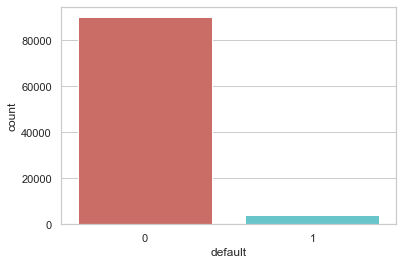

<Figure size 432x288 with 0 Axes>

In [10]:
sns.countplot(x = 'default', data = data, palette = 'hls')
plt.show()
plt.savefig('count_plot')

In [11]:
data.groupby('default').mean()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30
default,,,,,,,,,,,,,,,,,,,,,
0,11.822342,84.230672,7416.424939,13662.168678,33.054178,36.449091,1.482856,125.157854,1.719536,1.42432,...,53.569756,0.073610,0.008519,0.013363,0.133277,293.143264,357.097880,103.820898,28.970002,38.780824
1,19.151247,75.011378,5141.529590,8664.491615,43.710538,49.003005,2.314202,100.506145,1.209305,1.01907,...,56.797249,0.092977,0.009258,0.017438,0.139242,237.055092,377.744133,95.870160,26.079825,32.414355


## Train and Test Split

In [12]:
y = data.default.copy()
X = data.drop(['default'], axis = 1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1111)

# Model 1: Logistic Regression Model

In [14]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [15]:
y_pred = pd.DataFrame(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


## Check for Accuracy, Precision, and Recall

In [16]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9563297872340426
Precision: 0.3559322033898305
Recall: 0.026119402985074626


## Confusion Matrix

Text(0.5, 12.5, 'Predicted')

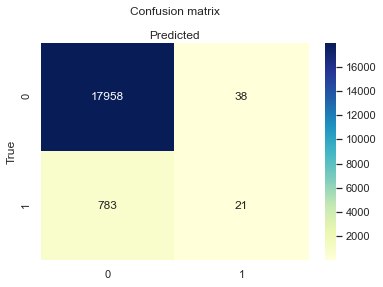

In [19]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[17958    38]
 [  783    21]]


## Classification Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17996
           1       0.36      0.03      0.05       804

    accuracy                           0.96     18800
   macro avg       0.66      0.51      0.51     18800
weighted avg       0.93      0.96      0.94     18800



## ROC Curve

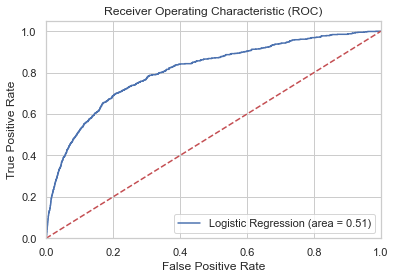

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### AUC Score

In [23]:
roc_auc_score(y_test, y_pred)

0.5120039113169428

# Validate Data

In [24]:
val = pd.read_csv("/Users/christopherhalim888/Downloads/Data Science HW design val.csv")

## Data Exploration

In [26]:
val['default'].value_counts()

0    10000
1     1500
Name: default, dtype: int64

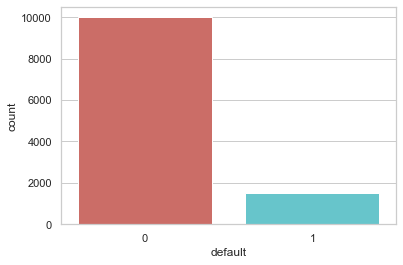

<Figure size 432x288 with 0 Axes>

In [27]:
sns.countplot(x = 'default', data = val, palette = 'hls')
plt.show()
plt.savefig('count_plot')

## Use the Model for Val Data

In [28]:
y1 = val.default.copy()
X1 = val.drop(['default'], axis = 1)

In [29]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.25, random_state=1)

In [30]:
y1_pred = pd.DataFrame(model.predict(X1_val))
y1_val = y1_val.reset_index(drop=True)
z = pd.concat([y1_val, y1_pred], axis=1)
z.columns = ['True', 'Prediction']

### Export Prediction to CSV

In [29]:
path = '/Users/christopherhalim888/OneDrive/Summer 2022 Internship Prep'

In [30]:
y1_pred.to_csv(path+'results1.csv')

## Check for Accuracy, Precision, and Recall

In [31]:
print("Accuracy:", metrics.accuracy_score(y1_val, y1_pred))
print("Precision:", metrics.precision_score(y1_val, y1_pred))
print("Recall:", metrics.recall_score(y1_val, y1_pred))

Accuracy: 0.8626086956521739
Precision: 0.7333333333333333
Recall: 0.02736318407960199


## Confusion Matrix

Text(0.5, 12.5, 'Predicted')

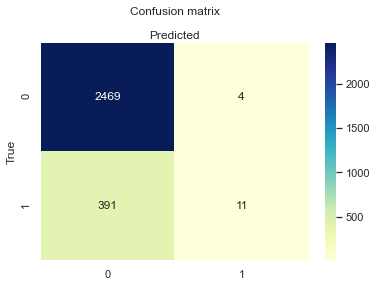

In [32]:
cnf_matrix = metrics.confusion_matrix(y1_val, y1_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_val, y1_pred)
print(confusion_matrix)

[[2469    4]
 [ 391   11]]


## Classification Report

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y1_val, y1_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      2473
           1       0.73      0.03      0.05       402

    accuracy                           0.86      2875
   macro avg       0.80      0.51      0.49      2875
weighted avg       0.85      0.86      0.80      2875



## ROC Curve

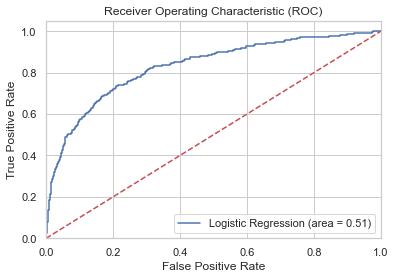

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y1_val, model.predict(X1_val))
fpr, tpr, thresholds = roc_curve(y1_val, model.predict_proba(X1_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### AUC Score

In [36]:
roc_auc_score(y1_val, y1_pred)

0.5128728577090287